# What are the best times on any day of the week to commute to/from work for a specific commute?

*Team Name: Data Ninjas

*Teammates: Molly Cox, Melissa Wright, Kat Anggasastra, Sreeteja Bollepalli

In [1]:
%matplotlib inline

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import time
import matplotlib.pyplot as plt
# Google API Key
from config import gkey

In [3]:
#Cool Map 
import gmaps
import gmaps.datasets
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="meliswright925")
# Configure gmaps
gmaps.configure(api_key=gkey)

In [4]:
# Retrieve parameters for query
commute_parameters_df = pd.read_csv("commute_parameters.csv")

# Fill in parameters for this notebook
times_to_work = commute_parameters_df['times_list_to_work'][0]
times_list_to_work = times_to_work.strip('][').split(', ') 
#print(times_list_to_work)

times_to_home = commute_parameters_df['times_list_to_home'][0]
times_list_to_home = times_to_home.strip('][').split(', ')
#print(times_list_to_home)

home_location = commute_parameters_df['home_location'][0]
work_location = commute_parameters_df['work_location'][0]

In [5]:
# Get list of dates from commute_dates.csv and store as a list
commute_dates_df = pd.read_csv("commute_dates.csv")
dates_list = commute_dates_df['Date'].tolist()

In [6]:
# Retrieve commute data from .csv files 
commute_to_work_df = pd.read_csv("commute_to_work.csv")
commute_to_work_df['Commute Time'] = commute_to_work_df['Commute Time'].astype(int) 
commute_to_home_df = pd.read_csv("commute_to_home.csv")
commute_to_home_df['Commute Time'] = commute_to_home_df['Commute Time'].astype(int) 

81


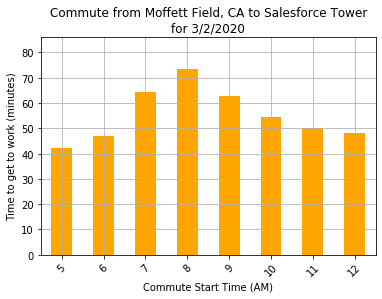

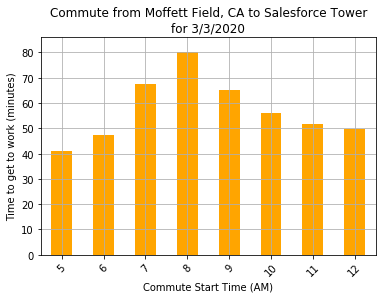

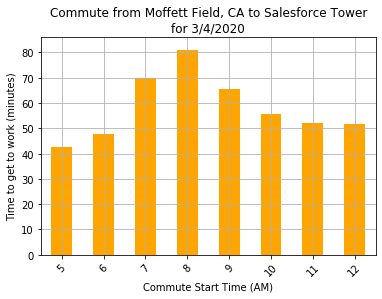

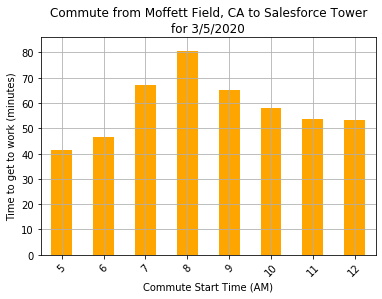

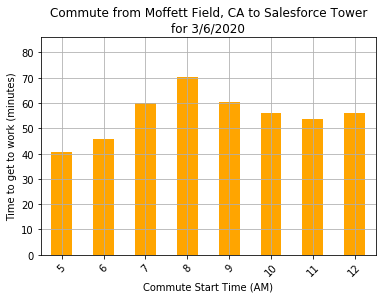

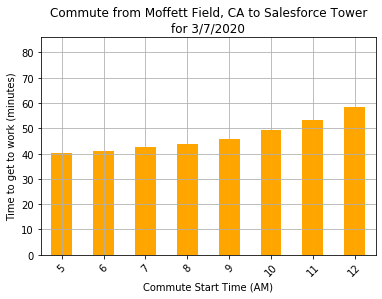

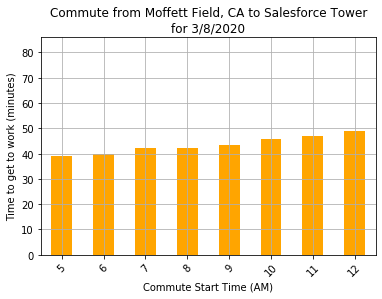

In [7]:
# Going to work...
# Create 7 bar charts, one for each day of week, with start times we have stored as x-axis 
# and commute time in minutes as y-axis
s_times_list_to_work = [str(item) for item in times_list_to_work]    
y_Max = round(commute_to_work_df['Commute Time'].max()/60)
print(y_Max)
for day in dates_list:
    commute_to_plot_df = commute_to_work_df[commute_to_work_df['Commute Date'] == day]
    work_trips = commute_to_plot_df['Commute Time']/60
    work_times = work_trips.plot(kind="bar", title= f"Commute from {home_location} to {work_location}\nfor {day}", color="orange",rot=45)
    work_times.set_xlabel("Commute Start Time (AM)")
    work_times.set_ylabel("Time to get to work (minutes)")
    work_times.set_xticklabels(s_times_list_to_work)
    work_times.set_ylim(0, y_Max+5)
    work_times.grid(b=True)
    plt.show()

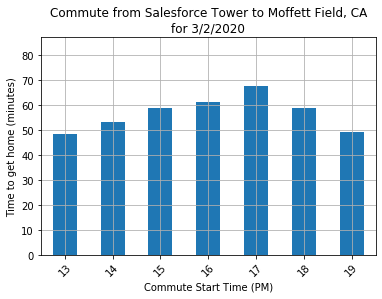

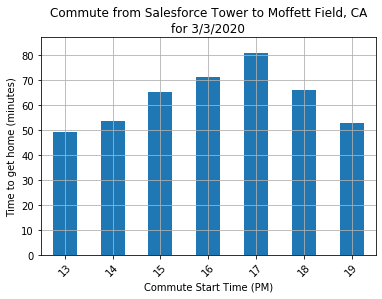

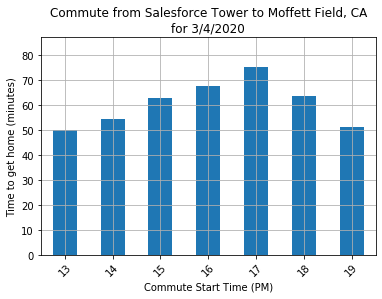

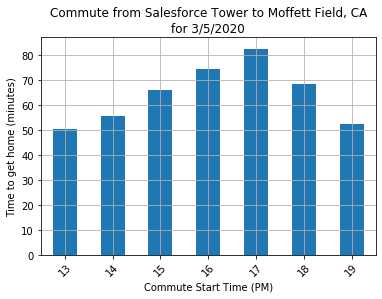

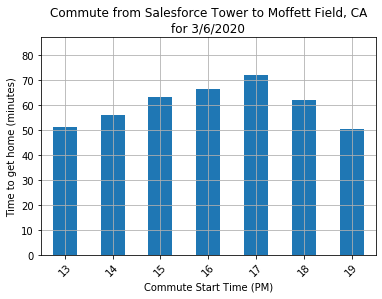

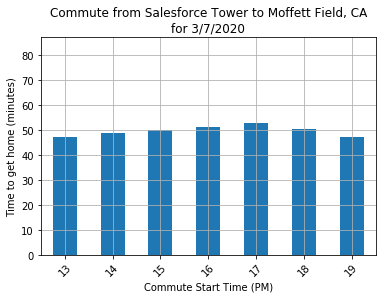

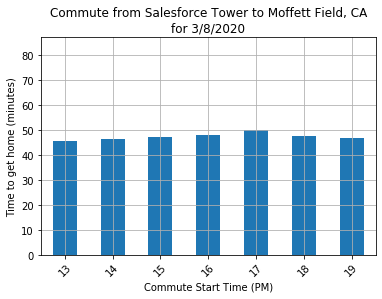

In [8]:
# Going Home...
# Create 7 bar charts, one for each day of week, with start times we have stored as x-axis 
# and commute time in minutes as y-axis
s_times_list_to_home = [str(item) for item in times_list_to_home]
y_Max = round(commute_to_home_df['Commute Time'].max()/60)
#print(y_Max)
for day in dates_list:
    commute_to_plot_df = commute_to_home_df[commute_to_home_df['Commute Date'] == day]
    work_trips = commute_to_plot_df['Commute Time']/60
    work_times = work_trips.plot(kind="bar", title= f"Commute from {work_location} to {home_location}\nfor {day}",rot=45)
    work_times.set_xlabel("Commute Start Time (PM)")
    work_times.set_ylabel("Time to get home (minutes)")
    work_times.set_xticklabels(s_times_list_to_home)
    work_times.set_ylim(0, y_Max+5)
    work_times.grid(b=True)
    plt.show()


In [9]:

#Script to get the map to show the commute
#sources: https://stackoverflow.com/questions/13686001/python-module-for-getting-latitude-and-longitude-from-the-name-of-a-us-city
#sources: https://geopy.readthedocs.io/en/stable/
#**You must run this in your Terminal**  jupyter nbextension enable --py gmaps

home = geolocator.geocode(home_location)
#print(home.raw)
work = geolocator.geocode(work_location)
#print(work.raw)

#Get the Lattitudes and Longitudes for the map
home_coord = (home.latitude, home.longitude)

work_coord = (work.latitude, work.longitude)

#Display the Map

fig = gmaps.figure()
directions = gmaps.directions_layer(home_coord, work_coord)
fig.add_layer(directions)
fig

Figure(layout=FigureLayout(height='420px'))

In [10]:
commute_to_work_df["Commute Time"] = round(commute_to_work_df["Commute Time"]/60)
commute_to_work_df

,Unnamed: 0,Epoch Time,Commute Time,Commute Date,Commute Start,Commute Name
0,0,1583154000,42.0,3/2/2020,5,"Moffett Field, CA to Salesforce Tower"
1,1,1583157600,47.0,3/2/2020,6,"Moffett Field, CA to Salesforce Tower"
2,2,1583161200,64.0,3/2/2020,7,"Moffett Field, CA to Salesforce Tower"
3,3,1583164800,74.0,3/2/2020,8,"Moffett Field, CA to Salesforce Tower"
4,4,1583168400,63.0,3/2/2020,9,"Moffett Field, CA to Salesforce Tower"
5,5,1583172000,54.0,3/2/2020,10,"Moffett Field, CA to Salesforce Tower"
6,6,1583175600,50.0,3/2/2020,11,"Moffett Field, CA to Salesforce Tower"
7,7,1583179200,48.0,3/2/2020,12,"Moffett Field, CA to Salesforce Tower"
8,8,1583240400,41.0,3/3/2020,5,"Moffett Field, CA to Salesforce Tower"
9,9,1583244000,47.0,3/3/2020,6,"Moffett Field, CA to Salesforce Tower"


<function matplotlib.pyplot.show(*args, **kw)>

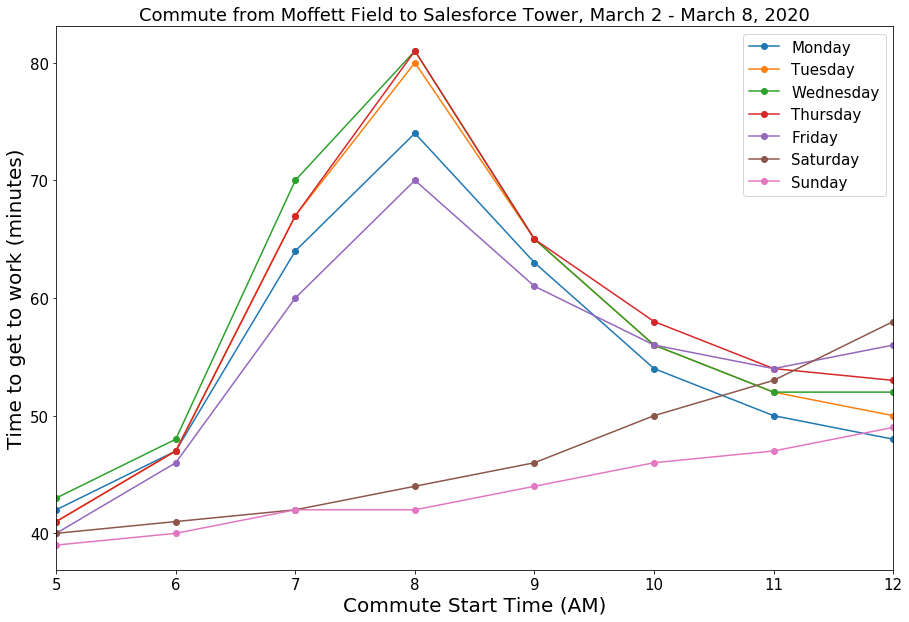

In [11]:
#plot Monday - Sunday Data 
fig, ax = plt.subplots(figsize=(15,10))

work_line = commute_to_work_df.groupby("Commute Date").plot(x="Commute Start", y="Commute Time", ax=ax, marker = 'o', fontsize="15")
plt.xlim(5,12)
plt.title("Commute from Moffett Field to Salesforce Tower, March 2 - March 8, 2020", fontsize = '18')
plt.xlabel("Commute Start Time (AM)", fontsize = "20")
plt.ylabel("Time to get to work (minutes)", fontsize = "20")
plt.legend(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize = '15')
plt.savefig("daily work commute by hour(PM).png")
plt.show

In [12]:
commute_to_home_df["Commute Time"] = round(commute_to_home_df["Commute Time"]/60)
commute_to_home_df

,Unnamed: 0,Epoch Time,Commute Time,Commute Date,Commute Start,Commute Name
0,0,1583182800,48.0,3/2/2020,13,"Salesforce Tower to Moffett Field, CA"
1,1,1583186400,53.0,3/2/2020,14,"Salesforce Tower to Moffett Field, CA"
2,2,1583190000,59.0,3/2/2020,15,"Salesforce Tower to Moffett Field, CA"
3,3,1583193600,61.0,3/2/2020,16,"Salesforce Tower to Moffett Field, CA"
4,4,1583197200,67.0,3/2/2020,17,"Salesforce Tower to Moffett Field, CA"
5,5,1583200800,59.0,3/2/2020,18,"Salesforce Tower to Moffett Field, CA"
6,6,1583204400,49.0,3/2/2020,19,"Salesforce Tower to Moffett Field, CA"
7,7,1583269200,49.0,3/3/2020,13,"Salesforce Tower to Moffett Field, CA"
8,8,1583272800,54.0,3/3/2020,14,"Salesforce Tower to Moffett Field, CA"
9,9,1583276400,65.0,3/3/2020,15,"Salesforce Tower to Moffett Field, CA"


<function matplotlib.pyplot.show(*args, **kw)>

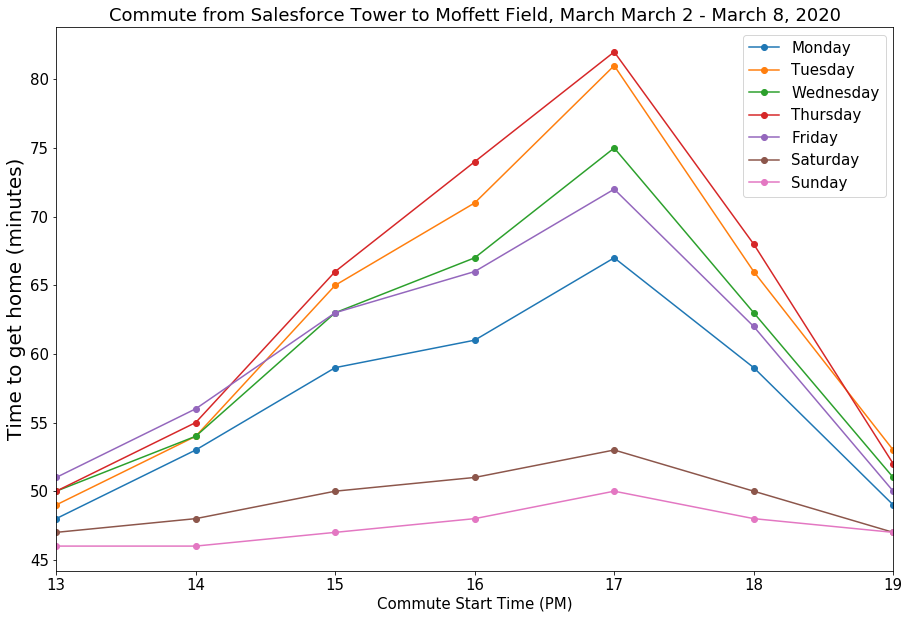

In [13]:
# plot Monday - Sunday Data 1pm - 7pm
fig, ax = plt.subplots(figsize=(15,10))

commute_to_home_df.groupby("Commute Date").plot(x="Commute Start", y="Commute Time", ax=ax, marker="o", fontsize = '15')
plt.xlim(13, 19
        )
plt.title("Commute from Salesforce Tower to Moffett Field, March March 2 - March 8, 2020", fontsize = '18')
plt.xlabel("Commute Start Time (PM)", fontsize = '15')
plt.ylabel("Time to get home (minutes)", fontsize = '20')
plt.legend(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize = '15')
plt.savefig("daily home commute by hour(PM).png")
plt.show

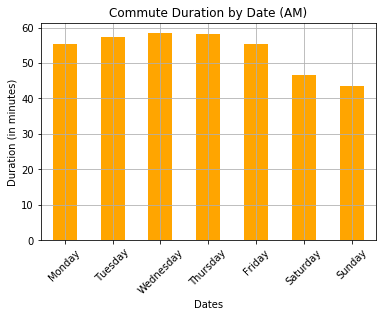

In [14]:
# Plot to show average commute time to work by Day
days_of_week = ['Monday','Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']

# Split up our data into groups based upon 'date'
work_group = commute_to_work_df.groupby('Commute Date')

# Find out how long each day took 
work_trips = work_group['Commute Time'].mean()

# Chart our data, give it a title, and label the axes
work_chart = work_trips.plot(kind="bar", title="Commute Duration by Date (AM)", color ='orange', rot=45)
work_chart.set_xlabel("Dates")
work_chart.set_ylabel("Duration (in minutes)")
work_chart.grid(b=True)
work_chart.set_xticklabels(days_of_week)

#Save the figure
plt.savefig("Commute duration by Date (AM).png")

# Create a bar chart based upon the above data
plt.show()

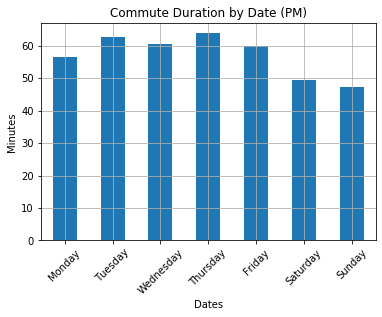

In [15]:
# Plot to show average commute time to home by Day

#Split up our data into groups based upon 'date'
home_group = commute_to_home_df.groupby('Commute Date')

# Find out how long each day took 
home_trips = home_group['Commute Time'].mean()

# Drop the 'stoptime' row that is contained within our group
#gender_trips = gender_trips.drop(gender_trips.index[3])

# Chart our data, give it a title, and label the axes
home_chart = home_trips.plot(kind="bar", title="Commute Duration by Date (PM)", rot = 45)
home_chart.set_xlabel("Dates")
home_chart.set_ylabel("Minutes")
home_chart.grid(b=True)
home_chart.set_xticklabels(days_of_week)

#Save the figure
plt.savefig("Commute duration by Date (PM).png")

# Create a bar chart based upon the above data
plt.show()